<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Условия." data-toc-modified-id="Условия.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Условия.</a></span></li><li><span><a href="#Задание-1." data-toc-modified-id="Задание-1.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задание 1.</a></span></li><li><span><a href="#Задание-2." data-toc-modified-id="Задание-2.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Задание 2.</a></span></li><li><span><a href="#Задание-3." data-toc-modified-id="Задание-3.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Задание 3.</a></span></li><li><span><a href="#Задание-4." data-toc-modified-id="Задание-4.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Задание 4.</a></span></li><li><span><a href="#Задание-5." data-toc-modified-id="Задание-5.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Задание 5.</a></span></li><li><span><a href="#Задание-6." data-toc-modified-id="Задание-6.-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Задание 6.</a></span></li></ul></div>

# Условия.

Зарплаты в San Francisco
https://www.kaggle.com/kaggle/sf-salaries?select=Salaries.csv 
1. Как со временем менялись зарплаты между разными группами (группировка по Department - fire, medicine, police)? (максимальная, медианная, средняя)
2. Как распределяются базовая оплата, сверхурочная работа и льготы между разными группами? Нужно построить диаграммы по распределению со временем для каждого департамента по базовым, сверхурочным и льготам
3. Как распределяется бюджет на разные группы (department) с течением времени?
4. Какое количество людей в каждом департаменте? 
5. Какое количество с разным уровнем дохода? (гистограмма с шагом в 5к) 
6. Топ 10 должностей по  среднему доходу.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
from ipywidgets import interact, interactive, fixed, interact_manual
from plotly.subplots import make_subplots
import plotly.graph_objects as go
cf.go_offline()

In [2]:
#Загрузка датасета
full_data = pd.read_csv('Salaries.csv')
full_data.head()

C:\Users\Stas\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning:

Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.



,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
full_data.shape

(148654, 13)

In [4]:
full_data.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status               object
dtype: object

In [5]:
full_data.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [6]:
full_data.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


In [7]:
full_data.drop(columns=['Notes','Id','EmployeeName','Agency','Status'],inplace=True)
data = full_data[full_data['JobTitle'] != 'Not provided']
data.reset_index(inplace = True, drop = True)
data['JobTitle'] = data['JobTitle'].str.lower()

In [8]:
def flag(df, title ):
    '''Функция разметки сотрудников по депортаментам'''
    
    res = []
    
    for row in df.iterrows():
        if 'police'  in row[1][title]:
            res.append('PD')
        elif 'sheriff'  in row[1][title]:
            res.append('PD')
        elif 'fire' in row[1][title]:
            res.append('FD')
        elif  'nurs'  in row[1][title]:
            res.append('HD')
        elif  'doctor'  in row[1][title]:
            res.append('HD')
        elif  'med'  in row[1][title]:
            res.append('HD')
        elif  'clinic'  in row[1][title]:
            res.append('HD')
        elif  'physician'  in row[1][title]:
            res.append('HD')
        else:
            res.append('Other dep')        
    return res

In [ ]:
#проверка функци на семпле датасета
data_sample = data.sample(10).copy()
data_sample['Flag'] = flag(data_sample, 'JobTitle')
data_sample 

In [9]:
#применение функции flag на весь датасет
data['flag'] = flag(data, 'JobTitle')

In [10]:
#оставляем только записи по нужным нам департаментам
data = data[data['flag'] != 'Other dep']

In [11]:
#корректируем формат данных
data['BasePay'] = data['BasePay'].astype('float64')
data['OvertimePay'] = data['OvertimePay'].astype('float64')
data['OtherPay'] = data['OtherPay'].astype('float64')
data['Benefits'] = data['Benefits'].astype('float64')

In [12]:
data.shape

(35500, 9)

In [13]:
data.isna().sum()

JobTitle               0
BasePay              106
OvertimePay            0
OtherPay               0
Benefits            9201
TotalPay               0
TotalPayBenefits       0
Year                   0
flag                   0
dtype: int64

In [14]:
data.dtypes

JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
flag                 object
dtype: object

In [15]:
data.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,35394.000000,35500.000000,35500.000000,26299.000000,35500.000000,35500.000000,35500.000000
mean,84353.701838,9686.830319,8097.460486,27801.598607,101886.119617,122482.013752,2012.484113
std,45472.463550,16388.039621,10432.561340,16385.221549,58471.426572,71131.355241,1.124995
min,0.000000,0.000000,-50.190000,-33.890000,0.000000,-33.890000,2011.000000
25%,50746.755000,0.000000,1153.987500,10965.535000,55362.692500,64897.507500,2011.000000
50%,95119.495000,3121.830000,5277.895000,33756.620000,112279.375000,130480.635000,2012.000000
75%,116713.710000,11025.835000,11976.557500,38959.750000,141684.785000,173887.772500,2013.000000
max,319275.010000,245131.880000,182234.590000,91302.460000,538909.280000,538909.280000,2014.000000


In [16]:
#Датафреймы по годам
data_11 = data[data['Year'] == 2011]
data_12 = data[data['Year'] == 2012]
data_13 = data[data['Year'] == 2013]
data_14 = data[data['Year'] == 2014]
#создаем датафреймы по каждому департаменту
data_pd = data[data['flag'] == 'PD']
data_fd = data[data['flag'] == 'FD']
data_hd = data[data['flag'] == 'HD']

# Задание 1.

In [59]:
#Изменение зарплат в департаменте полиции по годам
data_pd.groupby('Year')['TotalPay'].agg(['mean', 'max', "median"]).iplot(kind = 'bar', title="Изменение зарплат в департаменте полиции по годам", 
                                                                         xaxis_title="Год",
                                                                         yaxis_title="Условные еденицы")
#Изменение зарплат в департаменте здравоохранения по годам
data_hd.groupby('Year')['TotalPay'].agg(['mean', 'max', "median"]).iplot(kind = 'bar', title="Изменение зарплат в департаменте здравоохранения по годам", 
                                                                         xaxis_title="Год",
                                                                         yaxis_title="Условные еденицы")
#Изменение зарплат в департаменте пожарных по годам
data_fd.groupby('Year')['TotalPay'].agg(['mean', 'max', "median"]).iplot(kind = 'bar', 
                                                                         title="Изменение зарплат в департаменте пожарных по годам", 
                                                                         xaxis_title="Год",
                                                                         yaxis_title="Условные еденицы")

При анализе 3-х графиков выше, можно существенные изменения в максимальных зарплатах по департамента полииции и здравоохранения, а пожарный департамент с минимальным изменениями в данных показателях.

In [60]:
#Средний общий доход в департаментах по годам
mean_tp = data.pivot_table(index='Year', values = 'TotalPay', columns='flag', aggfunc='mean' )
mean_tp.iplot(kind = 'bar', title="Средний общий доход в департаментах по годам", 
                                                                         xaxis_title="Год",
                                                                         yaxis_title="Условные еденицы")

In [ ]:
Данный график указывает нам на слабую динамику изменений по департаментам.

# Задание 2.

In [51]:
#распределение доходов по типам в полицейском департаменте
data_pd.groupby('Year')[['BasePay', 'OtherPay', 'OvertimePay', 'Benefits']].agg('sum').iplot(kind = 'bar', title="Распределение доходов по типам в полицейском департаменте", 
                                                                         xaxis_title="Год",
                                                                         yaxis_title="Условные еденицы")
#распределение доходов по типам в пожарном департаменте
data_fd.groupby('Year')[['BasePay', 'OtherPay', 'OvertimePay', 'Benefits']].agg('sum').iplot(kind = 'bar', title="Распределение доходов по типам в пожарном департаменте", 
                                                                         xaxis_title="Год",
                                                                         yaxis_title="Условные еденицы")
#распределение доходов по типам в мед. департаменте
data_hd.groupby('Year')[['BasePay', 'OtherPay', 'OvertimePay', 'Benefits']].agg('sum').iplot(kind = 'bar', title="Распределение доходов по типам в мед. департаменте", 
                                                                         xaxis_title="Год",
                                                                         yaxis_title="Условные еденицы")

Во всех департаментах "Benefits" появляется в 2012 году. В полицейском департаменте складывается ощущение, что статься 'Benedits'
выделена из "BasePay", в отличие от других департаментов, где при добавлении 'Benefits', 'BasePay' не уменьшилась а даже выросла.
Так же нужно отметить, что больше всего овертаймов в пожарном департаменте.

# Задание 3.

In [52]:
#расходы департаментов на оплату труда по годам
dep = data.pivot_table(index='Year', values = 'TotalPay', columns='flag', aggfunc='sum' )
dep.iplot(kind = 'bar', title="Расходы департаментов на оплату труда по годам", 
                                                                         xaxis_title="Год",
                                                                         yaxis_title="Условные еденицы")


На данном графике видим изменение в полицейском департаменте с 11 по 12 год.

# Задание 4.

In [53]:
#Количество сотрудников по департаментам
number_of_humans = data.pivot_table(index='Year', values = 'JobTitle', columns='flag', aggfunc='size' )
number_of_humans.iplot(kind = 'bar', title="Количество сотрудников по департаментам", 
                                                                         xaxis_title="Год",
                                                                         yaxis_title="Кол-во сотрудников")

В совокупности с предыдущим графиком, можем предположить, что были какие-то изменения в полицейском департаменте, возможно была какая-то реформа.

# Задание 5.

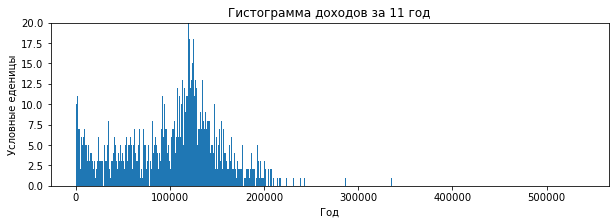

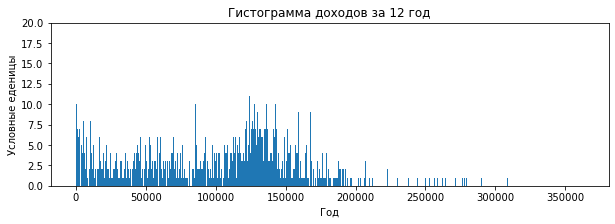

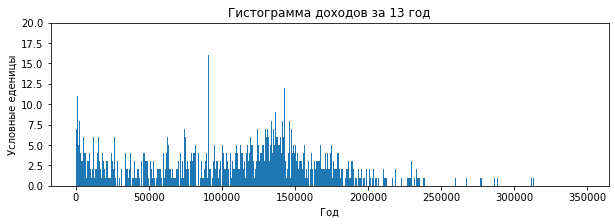

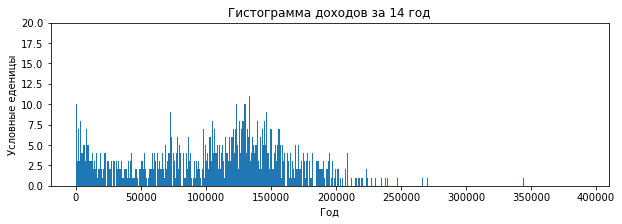

In [55]:
#гистограмма доходов за 11 год
plt.figure(figsize=(10,3))
plt.hist(data_11['TotalPay'], bins = 5000)
plt.ylabel('Условные еденицы');
plt.xlabel('Год');
plt.title('Гистограмма доходов за 11 год');
plt.ylim((0,20));
#гистограмма доходов за 12 год
plt.figure(figsize=(10,3))
plt.hist(data_12['TotalPay'], bins = 5000)
plt.ylabel('Условные еденицы');
plt.xlabel('Год');
plt.title('Гистограмма доходов за 12 год');
plt.ylim((0,20));
#гистограмма доходов за 13 год
plt.figure(figsize=(10,3))
plt.hist(data_13['TotalPay'], bins = 5000)
plt.ylabel('Условные еденицы');
plt.xlabel('Год');
plt.title('Гистограмма доходов за 13 год');
plt.ylim((0,20));
#гистограмма доходов за 14 год
plt.figure(figsize=(10,3))
plt.hist(data_14['TotalPay'], bins = 5000)
plt.ylabel('Условные еденицы');
plt.xlabel('Год');
plt.title('Гистограмма доходов за 14 год');
plt.ylim((0,20));


# Задание 6.

In [63]:
data_11[data_11['flag'] == 'PD'].groupby('JobTitle')['TotalPay'].agg('mean').sort_values()[-10:].iplot(kind = 'barh', 
                                                                                                       title="Топ 10 должностей по среднему доходу за 11 год в полицейском департаменте.", 
                                                                                                        xaxis_title="Условные еденицы",
                                                                                                        yaxis_title="Наименование должности")
data_12[data_12['flag'] == 'PD'].groupby('JobTitle')['TotalPay'].agg('mean').sort_values()[-10:].iplot(kind = 'barh', 
                                                                                                       title="Топ 10 должностей по среднему доходу за 12 год в полицейском департаменте.", 
                                                                                                        xaxis_title="Условные еденицы",
                                                                                                        yaxis_title="Наименование должности")
data_13[data_13['flag'] == 'PD'].groupby('JobTitle')['TotalPay'].agg('mean').sort_values()[-10:].iplot(kind = 'barh', 
                                                                                                       title="Топ 10 должностей по среднему доходу за 13 год в полицейском департаменте.", 
                                                                                                        xaxis_title="Условные еденицы",
                                                                                                        yaxis_title="Наименование должности")
data_14[data_14['flag'] == 'PD'].groupby('JobTitle')['TotalPay'].agg('mean').sort_values()[-10:].iplot(kind = 'barh', 
                                                                                                       title="Топ 10 должностей по среднему доходу за 14 год в полицейском департаменте.", 
                                                                                                        xaxis_title="Условные еденицы",
                                                                                                        yaxis_title="Наименование должности")


В полицейском департаменте прослеживается растущая разница между руководителем департамента и остальными сотрудниками.

In [64]:
data_11[data_11['flag'] == 'FD'].groupby('JobTitle')['TotalPay'].agg('mean').sort_values()[-10:].iplot(kind = 'barh', 
                                                                                                       title="Топ 10 должностей по среднему доходу за 11 год в пожарном департаменте.", 
                                                                                                        xaxis_title="Условные еденицы",
                                                                                                        yaxis_title="Наименование должности")
data_12[data_12['flag'] == 'FD'].groupby('JobTitle')['TotalPay'].agg('mean').sort_values()[-10:].iplot(kind = 'barh', 
                                                                                                       title="Топ 10 должностей по среднему доходу за 12 год в пожарном департаменте.", 
                                                                                                        xaxis_title="Условные еденицы",
                                                                                                        yaxis_title="Наименование должности")
data_13[data_13['flag'] == 'FD'].groupby('JobTitle')['TotalPay'].agg('mean').sort_values()[-10:].iplot(kind = 'barh', 
                                                                                                       title="Топ 10 должностей по среднему доходу за 13 год в пожарном департаменте.", 
                                                                                                        xaxis_title="Условные еденицы",
                                                                                                        yaxis_title="Наименование должности")
data_14[data_14['flag'] == 'FD'].groupby('JobTitle')['TotalPay'].agg('mean').sort_values()[-10:].iplot(kind = 'barh', 
                                                                                                       title="Топ 10 должностей по среднему доходу за 14 год в пожарном департаменте.", 
                                                                                                        xaxis_title="Условные еденицы",
                                                                                                        yaxis_title="Наименование должности")

Наиболее стабильным является пожарный департамент.

In [65]:
data_11[data_11['flag'] == 'HD'].groupby('JobTitle')['TotalPay'].agg('mean').sort_values()[-10:].iplot(kind = 'barh', 
                                                                                                       title="Топ 10 должностей по среднему доходу за 11 год в департаменте здравоохранения.", 
                                                                                                        xaxis_title="Условные еденицы",
                                                                                                        yaxis_title="Наименование должности")
data_12[data_12['flag'] == 'HD'].groupby('JobTitle')['TotalPay'].agg('mean').sort_values()[-10:].iplot(kind = 'barh', 
                                                                                                       title="Топ 10 должностей по среднему доходу за 12 год в департаменте здравоохранения.", 
                                                                                                        xaxis_title="Условные еденицы",
                                                                                                        yaxis_title="Наименование должности")
data_13[data_13['flag'] == 'HD'].groupby('JobTitle')['TotalPay'].agg('mean').sort_values()[-10:].iplot(kind = 'barh', 
                                                                                                       title="Топ 10 должностей по среднему доходу за 13 год в департаменте здравоохранения.", 
                                                                                                        xaxis_title="Условные еденицы",
                                                                                                        yaxis_title="Наименование должности")
data_14[data_14['flag'] == 'HD'].groupby('JobTitle')['TotalPay'].agg('mean').sort_values()[-10:].iplot(kind = 'barh', 
                                                                                                       title="Топ 10 должностей по среднему доходу за 14 год в департаменте здравоохранения.", 
                                                                                                        xaxis_title="Условные еденицы",
                                                                                                        yaxis_title="Наименование должности")

Депаратамент здравоохранения динамично развивается.